# 6. 데이터정제 실전과제

## 6-1. 데이터 불러오기 및 탐색

In [1]:
import pandas as pd
data=pd.read_csv('house_raw.csv')
data.head()

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000
2,35,5.1155,0.249061,1.902676,3.888078,500000
3,32,4.7109,0.231383,1.913669,4.508393,500000
4,21,4.5625,0.255583,3.092664,4.667954,500000


In [5]:
data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000,17914.000000
mean,27.307022,3.664086,0.214309,3.007667,5.370672,188692.620130
std,11.297204,1.526694,0.055251,4.579534,2.332776,95318.621139
min,1.000000,0.499900,0.100000,0.692308,0.846154,14999.000000
25%,18.000000,2.526125,0.177544,2.467031,4.426115,114325.000000
50%,28.000000,3.447800,0.204256,2.853499,5.199222,170800.000000
75%,36.000000,4.583300,0.240476,3.318866,5.970848,242100.000000
max,51.000000,9.905500,1.000000,599.714286,132.533333,500000.000000


array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

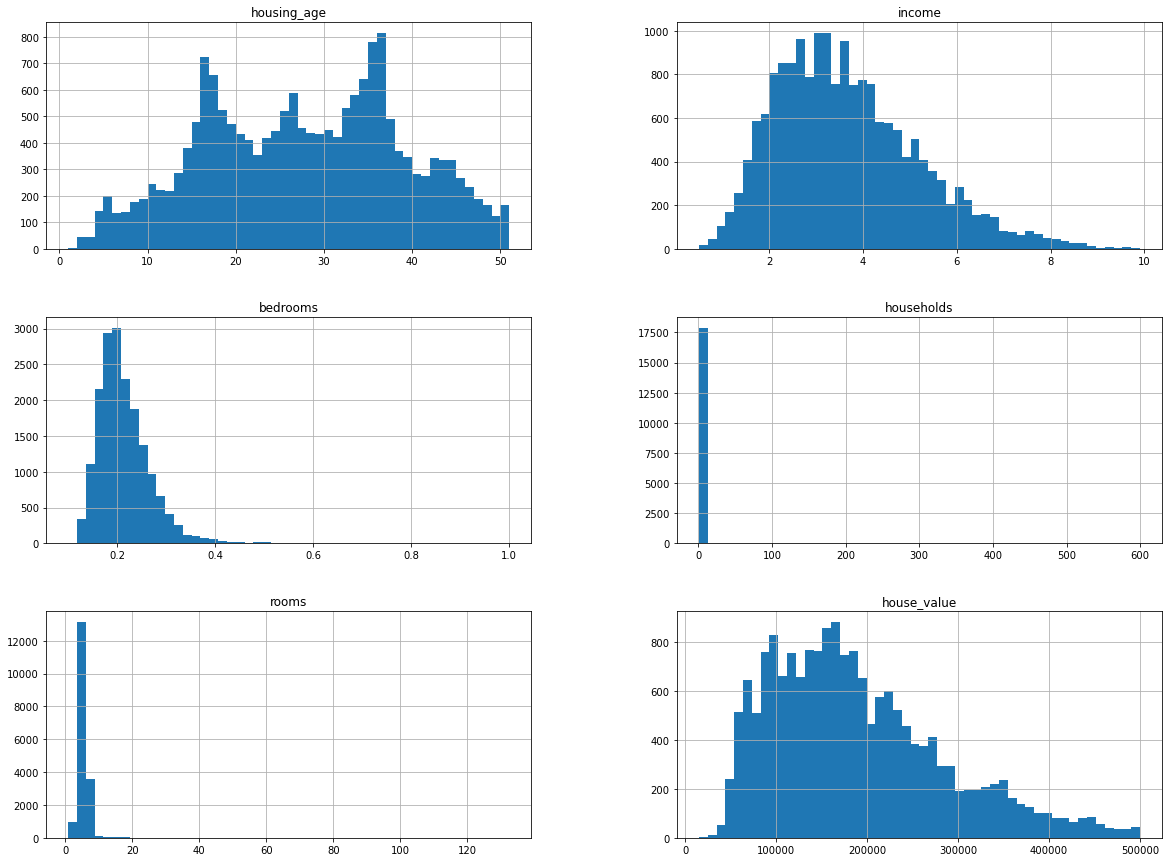

In [6]:
data.hist(bins=50, figsize=(20,15))

## 6-2. 선형회귀 적용 (정제 전 데이터)

In [7]:
# 특성데이터셋, 레이블 데이터셋 나누기
X=data[data.columns[0:5]]
y=data[["house_value"]]

In [ ]:
# 학습용 데이터(train)와 테스트용 데이터(test) 구분을 위한 라이브러리 불러오기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

In [17]:
# 데이터 정규화(min-max)를 위한 라이브러리 설정
from sklearn.preprocessing import MinMaxScaler
scaler_minmax=MinMaxScaler()

# 훈련데이터 및 데스트데이터 정규화
scaler_minmax.fit(X_train)
X_scaled_minmax_train=scaler_minmax.transform(X_train)
X_scaled_minmax_test=scaler_minmax.transform(X_test)

In [18]:
# 선형 모델 적용
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_scaled_minmax_train, y_train)

LinearRegression()

In [20]:
# 훈련데이터의 정확도(R-square: 설명력) 확인
pred_train=model.predict(X_scaled_minmax_train)
model.score(X_scaled_minmax_train, y_train)

0.5463729131516732

In [21]:
# 테스트데이터의 정확도(R-square: 설명력) 확인
pred_test=model.predict(X_scaled_minmax_test)
model.score(X_scaled_minmax_test, y_test)

-2.822064801016153

## 6-3. 데이터 정제를 위한 세부 검토

### 가. bedrooms

<AxesSubplot:>

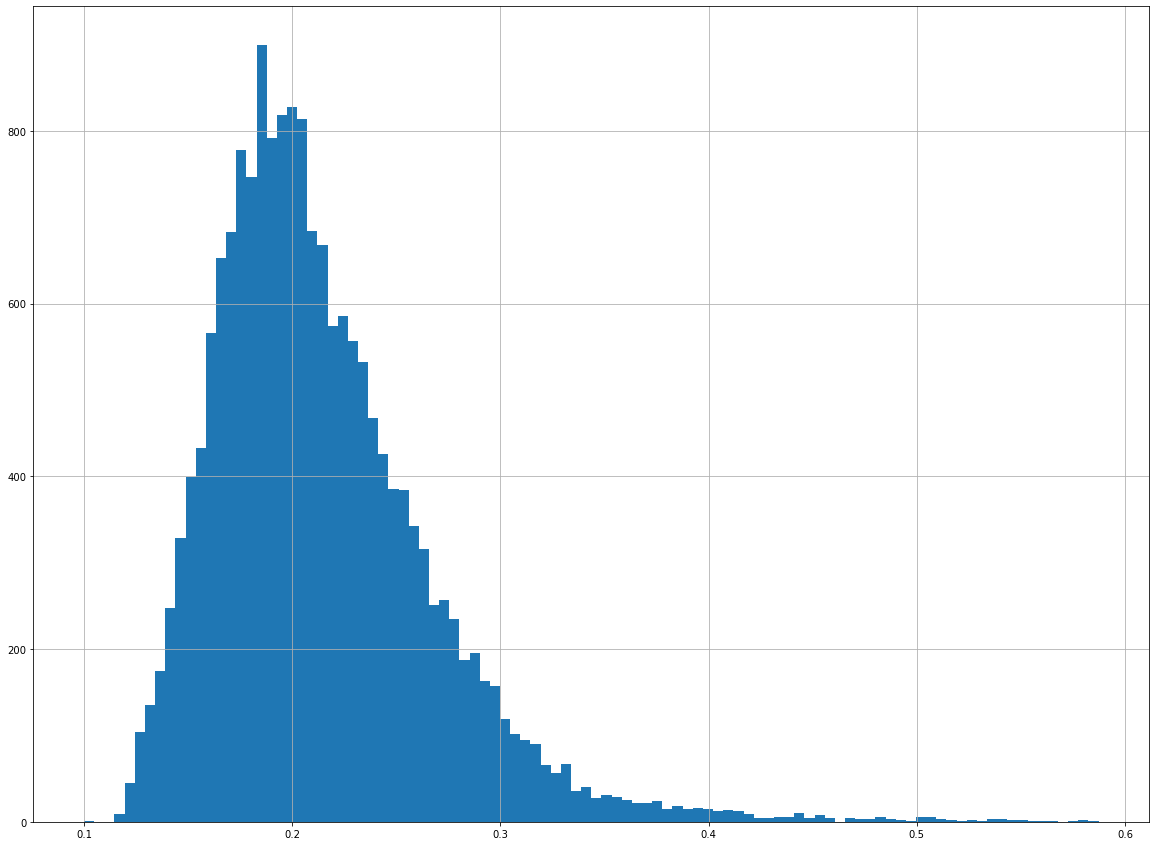

In [22]:
# bedrooms 변수의 상세 분포 확인
data_bedroom=data[data['bedrooms']<0.6]
data_bedroom['bedrooms'].hist(bins=100, figsize=(20,15))

In [23]:
# bedrooms 변수의 이상치 데이터 확인
data_bedroom2=data[data['bedrooms']>=0.6]
print(data_bedroom2['bedrooms'].value_counts())
data_bedroom2

1.000000    3
0.686114    1
0.635258    1
0.750000    1
0.613084    1
0.602489    1
0.923077    1
0.625887    1
0.700000    1
0.627338    1
0.662539    1
0.658869    1
Name: bedrooms, dtype: int64


,housing_age,income,bedrooms,households,rooms,house_value
1732,43,1.3157,0.602489,2.133660,1.911826,333300
1911,25,1.7866,0.635258,3.566327,1.678571,325000
3162,26,1.4904,0.658869,3.750779,1.598131,275000
3165,12,1.2012,0.613084,3.271233,1.465753,275000
5446,24,1.8304,0.662539,3.973545,1.708995,225000
7674,45,1.4940,0.625887,3.673981,1.768025,187500
7677,20,1.0938,0.923077,1.739130,1.130435,187500
9658,46,2.8750,1.000000,1.846154,0.846154,162500
9716,16,0.5360,1.000000,18.444444,2.111111,162500
11810,37,2.7634,0.700000,4.524194,1.411290,137500


### 나. households

<AxesSubplot:>

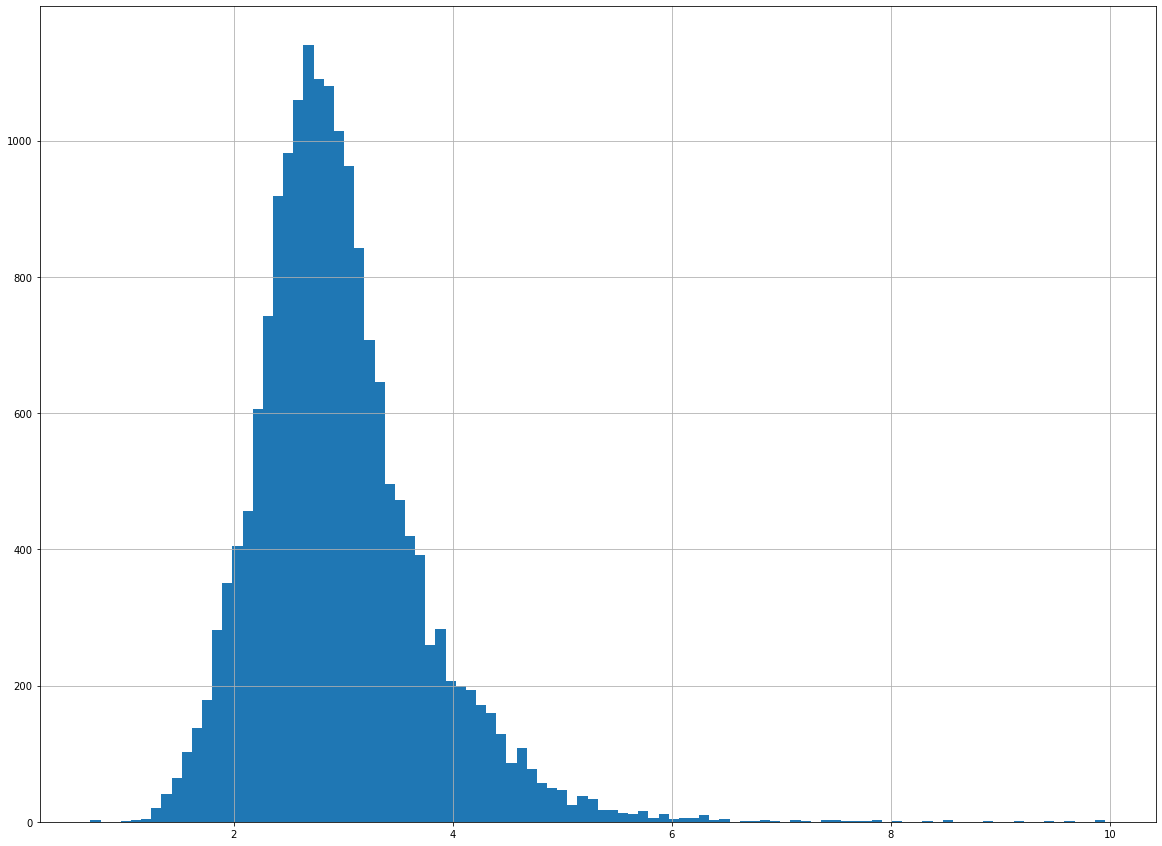

In [24]:
# households 변수의 상세 분포 확인
data_households=data[data['households']<10]
data_households['households'].hist(bins=100, figsize=(20,15))

In [25]:
# households 변수의 이상치 데이터 확인
data_households2=data[data['households']>=10]
print(data_households2['households'].value_counts())
data_households2

14.000000     1
33.952941     1
12.234043     1
12.130081     1
12.843750     1
12.098940     1
18.500000     1
12.296089     1
12.895397     1
19.312500     1
16.937500     1
599.714286    1
11.634146     1
13.693487     1
18.444444     1
63.750000     1
13.594828     1
51.400000     1
10.980000     1
16.048780     1
10.153846     1
15.812155     1
Name: households, dtype: int64


,housing_age,income,bedrooms,households,rooms,house_value
2420,20,1.0298,0.338658,13.693487,2.398467,300000
5398,33,3.8750,0.218310,12.234043,3.021277,225000
8003,36,4.2578,0.212528,33.952941,5.258824,183300
9617,26,5.7485,0.167702,51.400000,5.366667,162500
9625,36,4.6250,0.142857,14.000000,24.500000,162500
9703,8,1.6250,0.125000,63.750000,7.600000,162500
9713,19,0.9573,0.338843,16.048780,2.951220,162500
9716,16,0.5360,1.000000,18.444444,2.111111,162500
11397,13,3.4107,0.218182,12.843750,5.156250,142500
11987,41,3.5769,0.222672,18.500000,4.940000,135700


### 다. rooms

<AxesSubplot:>

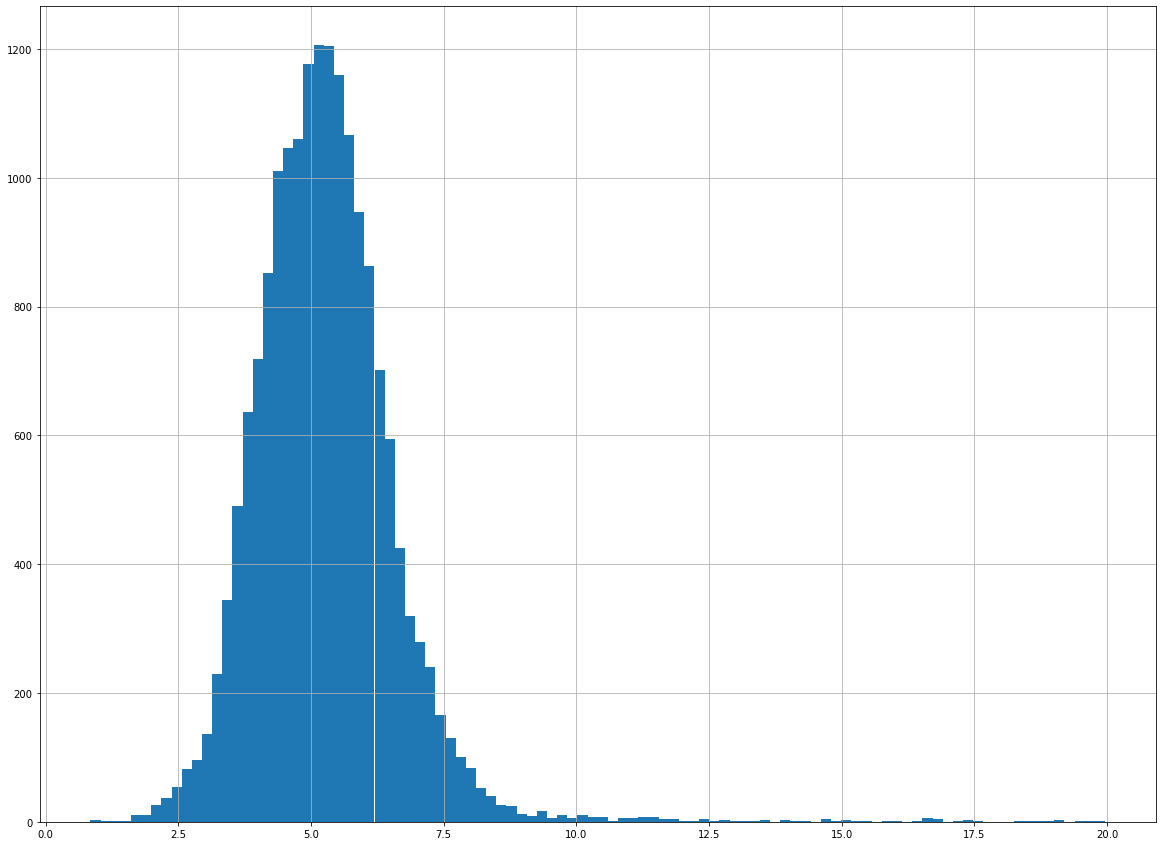

In [26]:
# rooms 변수의 상세 분포 확인
data_room=data[data['rooms']<20]
data_room['rooms'].hist(bins=100, figsize=(20,15))

In [27]:
# bedrooms 변수의 이상치 데이터 확인
data_room2=data[data['rooms']>=20]
print(data_room2['rooms'].value_counts())
data_room2

24.500000    2
52.690476    1
52.848214    1
29.852941    1
36.075472    1
            ..
28.615385    1
20.520697    1
23.547368    1
24.024194    1
24.532895    1
Name: rooms, Length: 63, dtype: int64


,housing_age,income,bedrooms,households,rooms,house_value
324,19,4.0714,0.177958,2.333333,61.812500,437500
457,17,2.1719,0.172918,2.581818,28.600000,420000
1140,18,5.5456,0.146182,2.273585,36.075472,360000
2146,17,3.9722,0.172642,2.608355,20.900783,313400
2858,14,4.1016,0.175109,2.136364,20.939394,283300
...,...,...,...,...,...,...
16222,11,3.1250,0.235332,2.484848,47.515152,77500
16429,16,0.4999,0.277372,1.368421,21.631579,73500
16584,10,3.1250,0.250564,2.285714,21.095238,71300
16844,25,2.6250,0.255741,1.750000,59.875000,67500


## 6-4. 정제 데이터셋 생성

In [28]:
# 정상데이터셋(new_data) = 침실 0.5미만, 가족수 7명 미만, 방 12개 미만인 데이터
new_data=data[(data['bedrooms']<0.5) & (data['households']<7) & (data['rooms']<12)]

In [29]:
new_data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000
mean,27.378823,3.671141,0.213278,2.952117,5.244001,189043.439313
std,11.280230,1.525937,0.051167,0.731573,1.184922,95487.122628
min,1.000000,0.499900,0.100000,0.750000,1.640000,14999.000000
25%,18.000000,2.532900,0.177464,2.470270,4.426829,114400.000000
50%,28.000000,3.453900,0.204104,2.854962,5.190779,171100.000000
75%,36.000000,4.591800,0.240157,3.316092,5.953728,242700.000000
max,51.000000,9.905500,0.498127,6.954023,11.901869,500000.000000


array([[<AxesSubplot:title={'center':'housing_age'}>,
        <AxesSubplot:title={'center':'income'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'households'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'house_value'}>]], dtype=object)

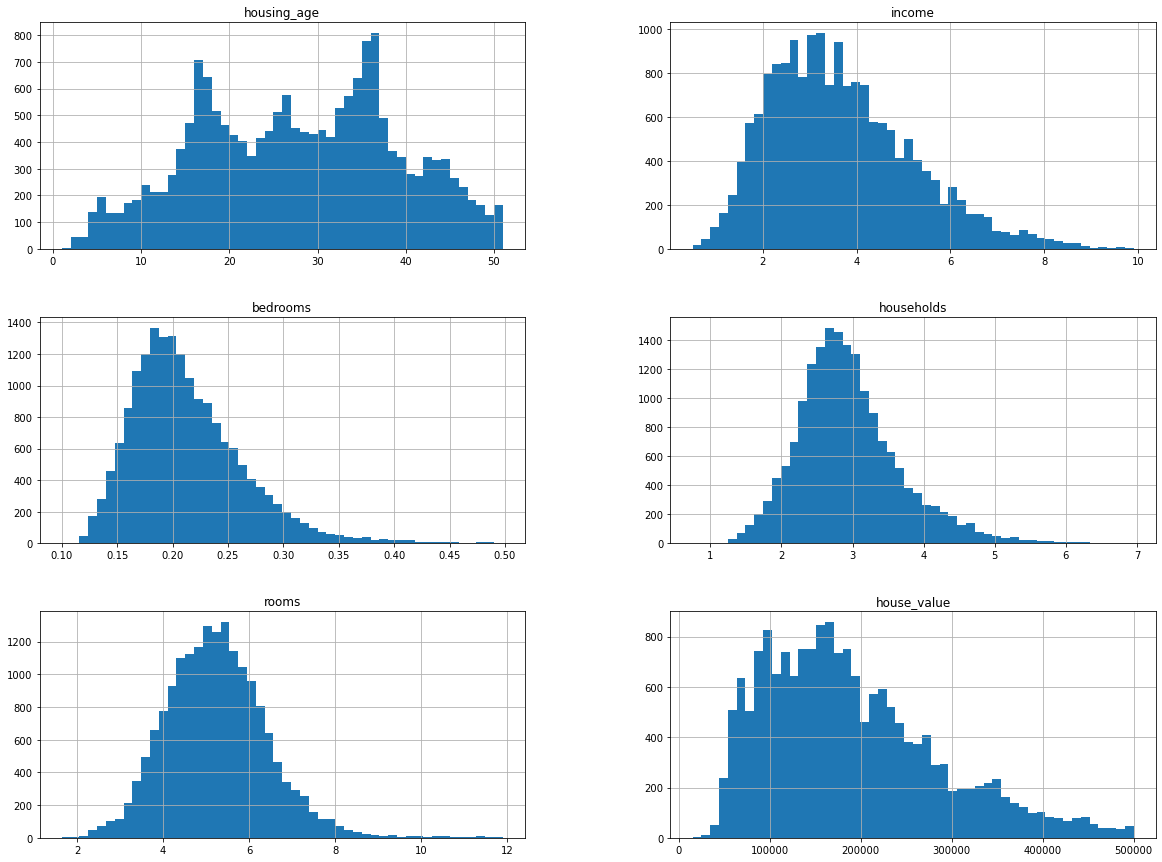

In [30]:
new_data.hist(bins=50, figsize=(20,15))

## 6-5. 선형회귀 적용 (정제 후 데이터)

In [31]:
# 특성데이터셋, 레이블 데이터셋 나누기
X=new_data[new_data.columns[0:5]]
y=new_data[["house_value"]]

# 학습용 데이터(train)와 테스트용 데이터(test) 구분을 위한 라이브러리 불러오기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42)

# 데이터 정규화(min-max)
from sklearn.preprocessing import MinMaxScaler
scaler_minmax=MinMaxScaler()

# 훈련데이터 및 데스트데이터 정규화
scaler_minmax.fit(X_train)
X_scaled_minmax_train=scaler_minmax.transform(X_train)
X_scaled_minmax_test=scaler_minmax.transform(X_test)

# 선형 모델 적용
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_scaled_minmax_train, y_train)

# 훈련데이터의 정확도(R-square: 설명력) 확인
pred_train=model.predict(X_scaled_minmax_train)
print("훈련데이터 정확도", model.score(X_scaled_minmax_train, y_train))

# 테스트데이터의 정확도(R-square: 설명력) 확인
pred_test=model.predict(X_scaled_minmax_test)
print("테스트데이터 정확도", model.score(X_scaled_minmax_test, y_test))

훈련데이터 정확도 0.5706921210926265
테스트데이터 정확도 0.5826083517811865


In [38]:
# 최종 데이터 저장
new_data.to_csv('house_price.csv', index=False)